- Image Data
- Categorical Classification
- Metric: 'Accuracy' , 'Overfitting', 'Callbacks'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
import tensorflow as tf

## 1. Load Dataset

In [ ]:
(train_data, train_targets) , (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(len(train_data))
print(train_data.shape)

print(len(train_targets))
print(train_targets[:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test.shape)
print(y_test[:5])

10000
(10000, 784)
10000
(10000,)
[9 2 1 1 6]


## 2. Visualization

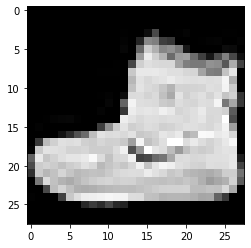

In [ ]:
digit = train_data[0]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [ ]:
np.set_printoptions(linewidth = 150)
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

## 3. Data Preprocessing
- reshape & normalization

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

train_data.shape, X_test.shape

((60000, 784), (10000, 784))

- Normalization

In [ ]:
train_data = train_data.astype(float) / 255
X_test = X_test.astype(float) / 255

print(X_train[0])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

- One Hot Encoding

In [ ]:
train_targets = to_categorical(train_targets)
y_test = to_categorical(y_test)

print(y_train[:5])

[5 6 0 2 7]


- Train & Validation Split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

## 3. Modeling

### 1) Define

(1) Case1

In [ ]:
mnist_1 = models.Sequential()

mnist_1.add(layers.Dense(512, activation = 'relu' , input_shape = (28 * 28, )))
mnist_1.add(layers.Dense(256, activation = 'relu'))
mnist_1.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


(2) Case2: L2 Regularization

In [ ]:
mnist_2 = models.Sequential(name = 'L2')

mnist_2.add(layers.Dense(512, activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001),
                         input_shape = (28 * 28,)))
mnist_2.add(layers.Dense(256, activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_2.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_2.summary()

Model: "L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


(3) Case3: Dropout

In [ ]:
mnist_3 = models.Sequential(name = 'Dropout')

mnist_3.add(layers.Dense(512, activation = 'relu' , input_shape = (28 * 28, )))
mnist_3.add(layers.Dropout(0.5))
mnist_3.add(layers.Dense(256, activation = 'relu'))
mnist_3.add(layers.Dropout(0.5))
mnist_3.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_3.summary()

Model: "Dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


(4) Case4: Batch Normalization

In [ ]:
K.clear_session()

mnist_4 = models.Sequential(name = 'Batch')

mnist_4.add(layers.Dense(512, input_shape = (28 * 28, )))
mnist_4.add(layers.BatchNormalization())
mnist_4.add(layers.Activation('relu'))
mnist_4.add(layers.Dense(512))
mnist_4.add(layers.BatchNormalization())
mnist_4.add(layers.Activation('relu'))
mnist_4.add(layers.Dense(256))
mnist_4.add(layers.BatchNormalization())
mnist_4.add(layers.Activation('relu'))
mnist_4.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_4.summary()

Model: "Batch"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328

(5) Case5: Batch & Dropout

In [ ]:
K.clear_session()

mnist_5 = models.Sequential(name = 'Batch_Dropout')

mnist_5.add(layers.Dense(512, input_shape = (28 * 28, )))
mnist_5.add(layers.Dropout(0.5))
mnist_5.add(layers.BatchNormalization())
mnist_5.add(layers.Activation('relu'))
mnist_5.add(layers.Dense(512, input_shape = (28 * 28, )))
mnist_5.add(layers.Dropout(0.5))
mnist_5.add(layers.BatchNormalization())
mnist_5.add(layers.Activation('relu'))
mnist_5.add(layers.Dense(256))
mnist_5.add(layers.Dropout(0.5))
mnist_5.add(layers.BatchNormalization())
mnist_5.add(layers.Activation('relu'))
mnist_5.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_5.summary()

Model: "Batch_Dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)             

(6) Batch & L2

In [ ]:
mnist_6 = models.Sequential(name = 'Batch_L2')

mnist_6.add(layers.Dense(512, input_shape = (28 * 28, ),
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_6.add(layers.BatchNormalization())
mnist_6.add(layers.Activation('relu'))
mnist_6.add(layers.Dense(256, kernel_regularizer= regularizers.l2(0.00001)))
mnist_6.add(layers.BatchNormalization())
mnist_6.add(layers.Activation('relu'))
mnist_6.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_6.summary()

Model: "Batch_L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                257

(7) Dropout & L2

In [ ]:
mnist_7 = models.Sequential(name = 'Dropout_L2')

mnist_7.add(layers.Dense(512, input_shape = (28 * 28, ),
                         activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_7.add(layers.Dropout(0.5))
mnist_7.add(layers.Dense(256, activation = 'relu' ,
                         kernel_regularizer = regularizers.l2(0.00001)))
mnist_7.add(layers.Dropout(0.5))
mnist_7.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_7.summary()

Model: "Dropout_L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
K.clear_session()

### 2) Compile

In [ ]:
mnist_1.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [ ]:
mnist_2.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [ ]:
mnist_3.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [ ]:
mnist_4.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [ ]:
mnist_5.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'adam' ,
                metrics = ['accuracy'])

In [ ]:
mnist_6.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [ ]:
mnist_7.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

### 3) EarlyStopping() & ModelCheckpoint()

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max' ,
                   patience = 50 ,
                   verbose = 1)

mc = ModelCheckpoint('best_fashion.h5' ,
                     monitor = 'val_accuracy' ,
                     mode = 'max' ,
                     save_best_only = True ,
                     verbose = 1)

### 4) Fit with callbacks

In [ ]:
%%time

Hist_mnist_1 = mnist_1.fit(X_train, y_train,
                           epochs = 500,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

In [ ]:
%%time

Hist_mnist_2 = mnist_2.fit(X_train, y_train,
                           epochs = 500,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

In [ ]:
Hist_mnist_3 = mnist_3.fit(X_train, y_train,
                           epochs = 500,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

In [ ]:
Hist_mnist_4 = mnist_4.fit(X_train, y_train,
                           epochs = 500,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/500
375/375 [==============================] - 3s 5ms/step - loss: 0.5686 - accuracy: 0.7953 - val_loss: 0.4970 - val_accuracy: 0.8286

Epoch 00001: val_accuracy did not improve from 0.90442
Epoch 2/500
375/375 [==============================] - 2s 4ms/step - loss: 0.3341 - accuracy: 0.8758 - val_loss: 0.3787 - val_accuracy: 0.8675

Epoch 00002: val_accuracy did not improve from 0.90442
Epoch 3/500
375/375 [==============================] - 2s 4ms/step - loss: 0.2849 - accuracy: 0.8915 - val_loss: 0.3758 - val_accuracy: 0.8636

Epoch 00003: val_accuracy did not improve from 0.90442
Epoch 4/500
375/375 [==============================] - 2s 4ms/step - loss: 0.2499 - accuracy: 0.9048 - val_loss: 0.4455 - val_accuracy: 0.8545

Epoch 00004: val_accuracy did not improve from 0.90442
Epoch 5/500
375/375 [==============================] - 2s 4ms/step - loss: 0.2301 - accuracy: 0.9122 - val_loss: 0.3390 - val_accuracy: 0.8814

Epoch 00005: val_accuracy did not improve from 0.90442
Epoch

In [ ]:
Hist_mnist_5 = mnist_5.fit(X_train, y_train,
                           epochs = 500,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

In [ ]:
Hist_mnist_6 = mnist_6.fit(X_train, y_train,
                           epochs = 500,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

In [ ]:
Hist_mnist_7 = mnist_7.fit(X_train, y_train,
                           epochs = 500,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

In [ ]:
Hist_mnist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 5) Visualization

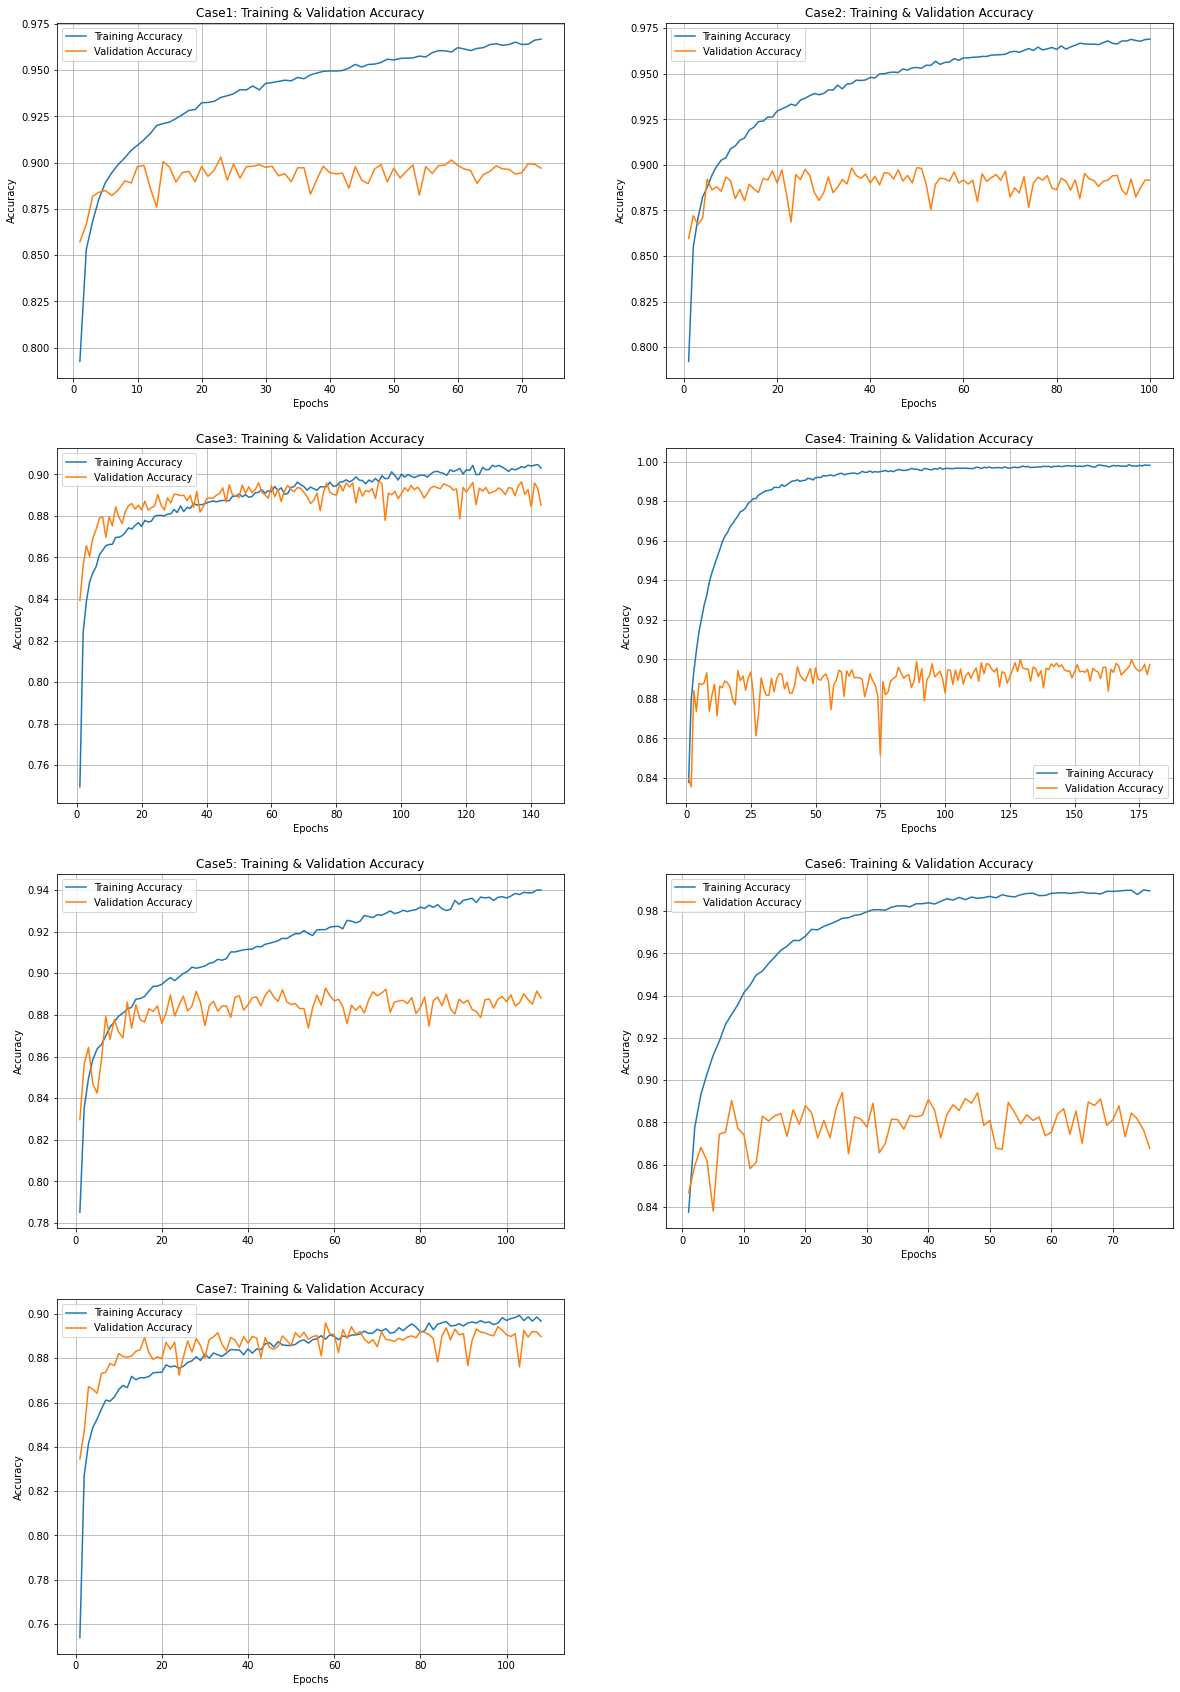

In [ ]:
epochs1 = range(1, len(Hist_mnist_1.history['val_accuracy']) + 1)
epochs2 = range(1, len(Hist_mnist_2.history['val_accuracy']) + 1)
epochs3 = range(1, len(Hist_mnist_3.history['val_accuracy']) + 1)
epochs4 = range(1, len(Hist_mnist_4.history['val_accuracy']) + 1)
epochs5 = range(1, len(Hist_mnist_5.history['val_accuracy']) + 1)
epochs6 = range(1, len(Hist_mnist_6.history['val_accuracy']) + 1)
epochs7 = range(1, len(Hist_mnist_7.history['val_accuracy']) + 1)


plt.figure(figsize = (20, 30))

plt.subplot(4, 2, 1)
plt.plot(epochs1, Hist_mnist_1.history['accuracy'])
plt.plot(epochs1, Hist_mnist_1.history['val_accuracy'])
plt.title('Case1: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs2, Hist_mnist_2.history['accuracy'])
plt.plot(epochs2, Hist_mnist_2.history['val_accuracy'])
plt.title('Case2: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 3)
plt.plot(epochs3, Hist_mnist_3.history['accuracy'])
plt.plot(epochs3, Hist_mnist_3.history['val_accuracy'])
plt.title('Case3: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs4, Hist_mnist_4.history['accuracy'])
plt.plot(epochs4, Hist_mnist_4.history['val_accuracy'])
plt.title('Case4: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 5)
plt.plot(epochs5, Hist_mnist_5.history['accuracy'])
plt.plot(epochs5, Hist_mnist_5.history['val_accuracy'])
plt.title('Case5: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs6, Hist_mnist_6.history['accuracy'])
plt.plot(epochs6, Hist_mnist_6.history['val_accuracy'])
plt.title('Case6: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 7)
plt.plot(epochs7, Hist_mnist_7.history['accuracy'])
plt.plot(epochs7, Hist_mnist_7.history['val_accuracy'])
plt.title('Case7: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.show()

### 6) Evaluate

In [ ]:
loss, accuracy = mnist_1.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.3440 - accuracy: 0.8858
Loss:  1.34398
Accuracy:  0.88580


In [ ]:
loss, accuracy = mnist_2.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.8509 - accuracy: 0.8835
Loss:  0.85089
Accuracy:  0.88350


In [ ]:
loss, accuracy = mnist_3.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.9954 - accuracy: 0.8728
Loss:  0.99537
Accuracy:  0.87280


In [ ]:
loss, accuracy = mnist_4.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.3092 - accuracy: 0.8885
Loss:  1.30923
Accuracy:  0.88850


In [ ]:
loss, accuracy = mnist_5.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3834 - accuracy: 0.8763
Loss:  0.38340
Accuracy:  0.87630


In [ ]:
loss, accuracy = mnist_6.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.1969 - accuracy: 0.8604
Loss:  1.19688
Accuracy:  0.86040


In [ ]:
loss, accuracy = mnist_7.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.8796
Loss:  0.49984
Accuracy:  0.87960


### 7) Best Accuracy: Batch Normalization 0.89770
- Adam 으로 바꿔서 다시 시행

In [ ]:
loss, accuracy = mnist_4.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.0466 - accuracy: 0.8977
Loss:  1.04658
Accuracy:  0.89770


- relu 를 sigmoid 로 변환

In [ ]:
loss, accuracy = mnist_4.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.7029 - accuracy: 0.8951
Loss:  0.70293
Accuracy:  0.89510


- tanh

In [ ]:
loss, accuracy = mnist_4.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.7857 - accuracy: 0.8852
Loss:  0.78570
Accuracy:  0.88520


In [ ]:
loss, accuracy = mnist_4.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.9462 - accuracy: 0.8915
Loss:  0.94621
Accuracy:  0.89150


In [ ]:
loss, accuracy = mnist_5.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8681
Loss:  0.43389
Accuracy:  0.86810


In [ ]:
loss, accuracy = mnist_4.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.6007 - accuracy: 0.8907
Loss:  1.60069
Accuracy:  0.89070
